In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
url = "https://raw.githubusercontent.com/digipodium/Datasets/main/diamond_pricing.csv"
df = pd.read_csv(url)
df.head()

,Paleonium,Pressure,Price
0,17,6567,2810.280298
1,59,5253,1986.967089
2,123,9715,2083.132087
3,182,2073,2236.340285
4,133,6400,1903.323339


visualize

In [3]:
px.scatter(df,x='Paleonium',y='Pressure',color='Price')

In [4]:
px.histogram(df,x='Price',)

In [5]:
X = df.drop(['Price'],axis=1)
y = df['Price']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R2: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")


R2: 0.9471719263002426
MAE: 107.34226195939999
MSE: 25295.681067874088


<AxesSubplot:ylabel='Density'>

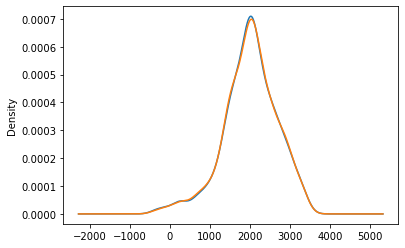

In [7]:
df['pred'] = model.predict(X_scaled)
ax = df['Price'].plot(kind='kde')
df['pred'].plot(kind='kde',ax=ax)

cross_validation

In [8]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [9]:
model = DecisionTreeRegressor()
cv = ShuffleSplit(n_splits=40, test_size=0.2, random_state=0)
cv_results = cross_validate(model, X_scaled, y, cv=cv, scoring=['r2', 'neg_mean_absolute_error'])

In [10]:
results_df = pd.DataFrame(cv_results)
results_df

,fit_time,score_time,test_r2,test_neg_mean_absolute_error
0,0.003000,0.000000,0.959004,-97.144947
1,0.002000,0.000000,0.964537,-95.595872
2,0.001000,0.001000,0.958835,-103.638657
3,0.001000,0.001000,0.963131,-99.522142
4,0.001000,0.001000,0.969738,-88.887081
5,0.001000,0.001001,0.965751,-90.404206
6,0.001000,0.001000,0.955143,-100.005366
7,0.002000,0.000000,0.965517,-94.694377
8,0.001000,0.001000,0.961479,-96.676127
9,0.002001,0.001000,0.953452,-109.618646


In [11]:
results_df['test_r2'].describe()

count    40.000000
mean      0.962059
std       0.007405
min       0.938052
25%       0.960551
50%       0.963402
75%       0.965789
max       0.972907
Name: test_r2, dtype: float64